# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Gymnastiar
- **Email:** agimduuduu@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

1. Seberapa besar perbedaan jumlah penyewaan sepeda pada tiap musim untuk pengguna kasual jika dibandingkan dengan pengguna terdaftar?

2. Bagaimana penggunaan layanan Bike Sharing selama musim salju dilihat dari waktu?

3. Seberapa besar pengaruh kondisi cuaca terhadap frekuensi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
!pip install -q kaggle

## Data Wrangling

### Data Collection

In [3]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 46.8MB/s]


In [4]:
!unzip /content/bike-sharing-dataset.zip

Archive:  /content/bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


**Insight:**
- Dari hasil unzip diatas dapat diketahui bahwa terdapat 3 file yang terdiri dari 2 file csv dan 1 file markdown.

### Gathering Data

In [5]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset ini berisi informasi tentang penyewaan sepeda dengan fitur-fitur utama berikut:

* Date and Time: tanggal, tahun, bulan, jam, dan hari dalam seminggu
* Season and Holidays: musim, status hari libur, dan status hari kerja
* Weather: kondisi cuaca, suhu, suhu yang dirasakan, kelembapan, dan kecepatan angin (semua telah dinormalisasi)
* User Types: jumlah pengguna kasual, pengguna terdaftar, dan total penyewaan sepeda

### Assessing Data

#### Day DataFrame

In [7]:
day_df.shape

(731, 16)

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
duplicated = day_df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicated}')
day_df.describe()

Jumlah data duplikat: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
* 731 baris & 16 kolom
* Terdapat kesalahan tipe data pada kolom dteday (tipe objek)
* Tidak ada nilai yang hilang dalam data
* Tidak ada data duplikat
* Tidak terdapat nilai yang tidak akurat

#### Hour DataFrame

In [11]:
hour_df.shape

(17379, 17)

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
duplicated = hour_df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicated}')
hour_df.describe()

Jumlah data duplikat: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
* 17.379 baris & 17 kolom
* Terdapat kesalahan tipe data pada kolom dteday (tipe objek)
* Tidak ada nilai yang hilang dalam data
* Tidak ada data duplikat
* Tidak terdapat nilai yang tidak akurat

### Cleaning Data


Menurut penilaian saya, terdapat ketergantungan antar kolom dalam dataset, yaitu:

* Workingday memiliki hubungan dengan Weekday.
* Holiday memiliki hubungan dengan Weekday.

Makna dari nilai pada kolom Holiday dan Workingday:

* Holiday: Jika nilai 0 berarti Tidak Libur/Masuk Kerja, maka nilai 1 berarti Libur.
* Workingday: Jika nilai 0 berarti Tidak Masuk Kerja/Libur, maka nilai 1 berarti Masuk Kerja.

Dari penjelasan di atas, terlihat bahwa kedua kolom ini memiliki ketergantungan yang sama dan makna yang serupa. Oleh karena itu, salah satu kolom dapat dihapus untuk menghindari redundansi dalam data.

Keputusan:

Pilih salah satu kolom untuk dipertahankan, misalnya Workingday, karena kolom ini lebih relevan untuk analisis terkait aktivitas kerja.
Hapus kolom Holiday karena informasinya dapat diwakili oleh Workingday.

In [15]:
# Menghapus kolom holiday
hour_df.drop('holiday', axis=1, inplace=True)
day_df.drop('holiday', axis=1, inplace=True)

In [16]:
day_df.rename(columns={'workingday': 'daystatus'}, inplace=True)
hour_df.rename(columns={'workingday': 'daystatus'}, inplace=True)

Mengubah tipe data kolom dteday dari object ke datetime pada dataframe day & hour

In [17]:
dataframe = [day_df, hour_df]

for df in dataframe:
  df['dteday'] = pd.to_datetime(df['dteday'])

In [18]:
yr_str = {
    0: '2011',
    1: '2012'
}

day_df['yr'] = day_df['yr'].map(yr_str)
hour_df['yr'] = hour_df['yr'].map(yr_str)

Mengubah season dari numerik ke actual nilai pada dataframe day & hour:
- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter

In [19]:
season_str = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_str)
hour_df['season'] = hour_df['season'].map(season_str)

In [20]:
day_df['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

Mengubah nilai mnth dari numerik ke string:
- 1: "Januari"
- 2: "Februari"
- 3: "Maret"
- 4: "April"
- 5: "Mei"
- 6: "Juni"
- 7: "Juli"
- 8: "Agustus"
- 9: "September"
- 10: "Oktober"
- 11: "November"
- 12: "Desember"

In [21]:
mnth_str = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}

day_df['mnth'] = day_df['mnth'].map(mnth_str)
hour_df['mnth'] = hour_df['mnth'].map(mnth_str)

In [22]:
day_df['mnth'].unique()

array(['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli',
       'Agustus', 'September', 'Oktober', 'November', 'Desember'],
      dtype=object)

Mengubah nilai weekday dari numerik ke string
- 0: "Minggu"
- 1: "Senin"
- 2: "Selasa"
- 3: "Rabu"
- 4: "Kamis"
- 5: "Jumat"
- 6: "Sabtu"

In [23]:
weekday_str = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

day_df['weekday'] = day_df['weekday'].map(weekday_str)
hour_df['weekday'] = hour_df['weekday'].map(weekday_str)

In [24]:
day_df['weekday'].unique()

array(['Sabtu', 'Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'],
      dtype=object)

Mengubah nilai weathersit	dari numerik ke string
- 1:"clear"
- 2:"mist"
- 3:"light snow"
- 4:"heavy rain"

In [25]:
weathersit_str = {
    1: "clear",
    2: "mist",
    3: "light snow",
    4: "heavy rain"
}

day_df['weathersit'] = day_df['weathersit'].map(weathersit_str)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_str)

In [26]:
hour_df['weathersit'].unique()

array(['clear', 'mist', 'light snow', 'heavy rain'], dtype=object)

In [27]:
workingday_str = {
    0: "Holiday",
    1: "Workingday"
}

day_df['daystatus'] = day_df['daystatus'].map(workingday_str)
hour_df['daystatus'] = hour_df['daystatus'].map(workingday_str)

In [28]:
day_df['daystatus'].unique()

array(['Holiday', 'Workingday'], dtype=object)

**Insight:**
- Menghapus kolom holiday yang tidak diperlukan, karena sudah diwakilkan oleh kolom workingday
- Mengubah tipe data
- Mengubah value dari numerik ke string

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,weekday,daystatus,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Januari,Sabtu,Workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,weekday,daystatus,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Mei,NaN,Sabtu,Workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [31]:
# Jumlah pengguna harian
day_df.groupby(by="weekday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered   cnt                           
        nunique     sum        sum   min   max         mean     sum
weekday                                                            
Jumat       104   78238     409552  1167  8362  4690.288462  487790
Kamis       104   61460     423935   431  7804  4667.259615  485395
Minggu      105  140521     303506   605  8227  4228.828571  444027
Rabu        104   57319     415729   441  8173  4548.538462  473048
Sabtu       105  153852     323955   627  8714  4550.542857  477807
Selasa      104   57843     411266   683  7767  4510.663462  469109
Senin       105   70784     384719    22  7525  4338.123810  455503

Jumlah data pengguna 'casual' dan 'registered' yang terakumulasi setiap hari menunjukkan variasi. Jumlah total pengguna 'casual' tertinggi terjadi pada hari Sabtu (153.852), sedangkan jumlah terendah tercatat pada hari Rabu (57.319). Sementara itu, untuk pengguna 'registered', jumlah tertinggi tercatat pada hari Kamis (423.935) dan terendah pada hari Minggu (303.506). Selain itu, total 'cnt' juga bervariasi antar hari, dengan jumlah tertinggi pada hari Jumat (487.790) dan terendah pada hari Minggu (444.027).

In [32]:
# Jumlah pengguna per-bulan rentang 2 tahun
day_df.groupby(by=["yr","mnth"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday casual registered   cnt                           
               nunique    sum        sum   min   max         mean     sum
yr   mnth                                                                
2011 Agustus        31  28842     107849  1115  5895  4409.387097  136691
     April          30  22346      72524   795  5312  3162.333333   94870
     Desember       31   8448      78875   705  3940  2816.870968   87323
     Februari       28   6242      41973  1005  2927  1721.964286   48215
     Januari        31   3073      35116   431  1985  1231.903226   38189
     Juli           31  36452     104889  3285  6043  4559.387097  141341
     Juni           30  30612     112900  3767  5515  4783.733333  143512
     Maret          31  12826      51219   605  3239  2065.967742   64045
     Mei            31  31050     104771  2633  5805  4381.322581  135821
     November       30  15594      86573  1495  4486  3405.566667  102167
     Oktober        31  25222      98289   627  5511  3984.225806  123511
     September      30  26545     100873  1842  5423  4247.266667  127418
2012 Agustus        31  43197     171306  4549  7865  6919.451613  214503
     April          30  38456     135768  1027  7460  5807.466667  174224
     Desember       31  13245     110468   441  6606  3990.741935  123713
     Februari       29   8721      94416  1529  5062  3556.448276  103137
     Januari        31   8969      87775  1301  4521  3120.774194   96744
     Juli           31  41705     161902  4459  8173  6567.967742  203607
     Juni           30  43294     159536  4127  8120  6761.000000  202830
     Maret          31  31618     133257  3194  8362  5318.548387  164875
     Mei            31  44235     151630  2843  8294  6318.225806  195865
     November       30  21009     131655  2277  6852  5088.800000  152664
     Oktober        31  34538     164303    22  8156  6414.225806  198841
     September      30  43778     174795  4073  8714  7285.766667  218573

di tahun 2011, pengguna Bike Sharing terbanyak terdapat pada bulan Juni dengan total 143.512 pengguna dan di tahun 2012, pengguna Bike Sharing terbanyak terdapat pada bulan September dengan total 218.573 pengguna.

In [33]:
# Jumlah pengguna berdasarkan season dan weather(cuaca)
hour_df.groupby(by=["season","weathersit"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered cnt                         
                  nunique     sum        sum min  max        mean     sum
season weathersit                                                        
Fall   clear          183  174014     627927   1  977  244.494207  801941
       light snow      72    9727      36529   1  891  171.955390   46256
       mist           140   42350     170582   2  868  224.848997  212932
Spring clear          174   44462     280816   1  801  122.055535  325278
       heavy rain       3       8        215  23  164   74.333333     223
       light snow      75    1392      20250   1  520   58.650407   21642
       mist           146   14760     109445   1  712  103.074689  124205
Summer clear          177  151197     513266   1  873  232.410983  664463
       light snow      91    7413      39350   1  782  115.179803   46763
       mist           146   44912     162451   1  957  181.261364  207363
Winter clear          166   93072     453419   1  967  209.463779  546491
       light snow      62    4251      39419   1  856  116.453333   43670
       mist           135   32459     218993   1  905  201.483974  251452

Berdasarkan musim dan kondisi cuaca, pengguna terbanyak terdapat di musim Fall saat cuaca clear dengan total 801.941 pengguna. Sementara pengguna paling sedikit terdapat di musim Spring saat cuaca heavy rain dengan total 223 pengguna.

In [34]:
day_df.groupby(by="daystatus").agg({
    "dteday": "count",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered  cnt                            
            count     sum        sum  min   max         mean      sum
daystatus                                                            
Holiday       231  316732     683537  605  8714  4330.168831  1000269
Workingday    500  303285    1989125   22  8362  4584.820000  2292410

Berdasarkan status hari:

* Pengguna Casual lebih banyak pada saat Holiday dibandingkan dengan saat Workingday, sementara pengguna Registered lebih banyak pada saat Workingday daripada saat Holiday.
* Akumulasi total pengguna cenderung lebih tinggi pada saat Workingday.

## Visualization & Explanatory Analysis





### Pertanyaan 1: Seberapa besar perbedaan jumlah penyewaan sepeda pada tiap musim untuk pengguna kasual jika dibandingkan dengan pengguna terdaftar?

In [35]:
sum_casual_user = hour_df.groupby("season").casual.sum().sort_values(ascending=False).reset_index()
sum_registered_user = hour_df.groupby("season").registered.sum().sort_values(ascending=False).reset_index()

daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="season",
    right_on="season"
)

daily_user

,season,casual,registered
0,Fall,226091,835038
1,Summer,203522,715067
2,Winter,129782,711831
3,Spring,60622,410726


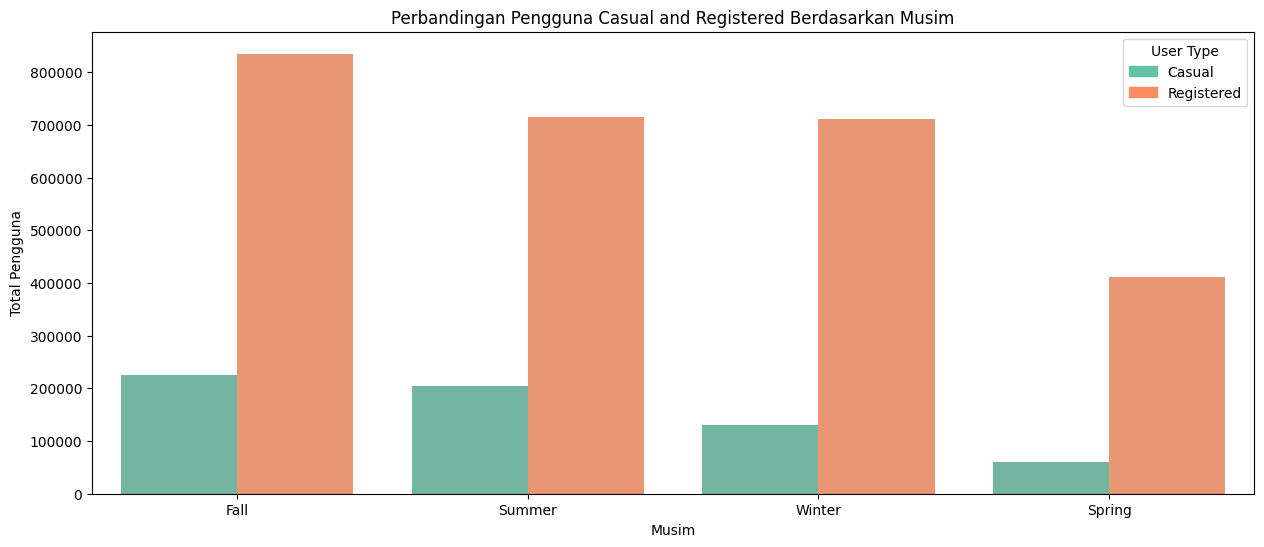

In [36]:
daily_user_type = daily_user.melt(id_vars='season', var_name='tipePengguna', value_name='jumlahPengguna')

plt.figure(figsize=(15, 6))


sns.barplot(x="season", y="jumlahPengguna", hue="tipePengguna", data=daily_user_type, palette="Set2")
plt.ylabel("Total Pengguna")
plt.xlabel("Musim")
plt.title("Perbandingan Pengguna Casual and Registered Berdasarkan Musim")
casual_patch = mpatches.Patch(color=sns.color_palette("Set2")[0], label='Casual')
registered_patch = mpatches.Patch(color=sns.color_palette("Set2")[1], label='Registered')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

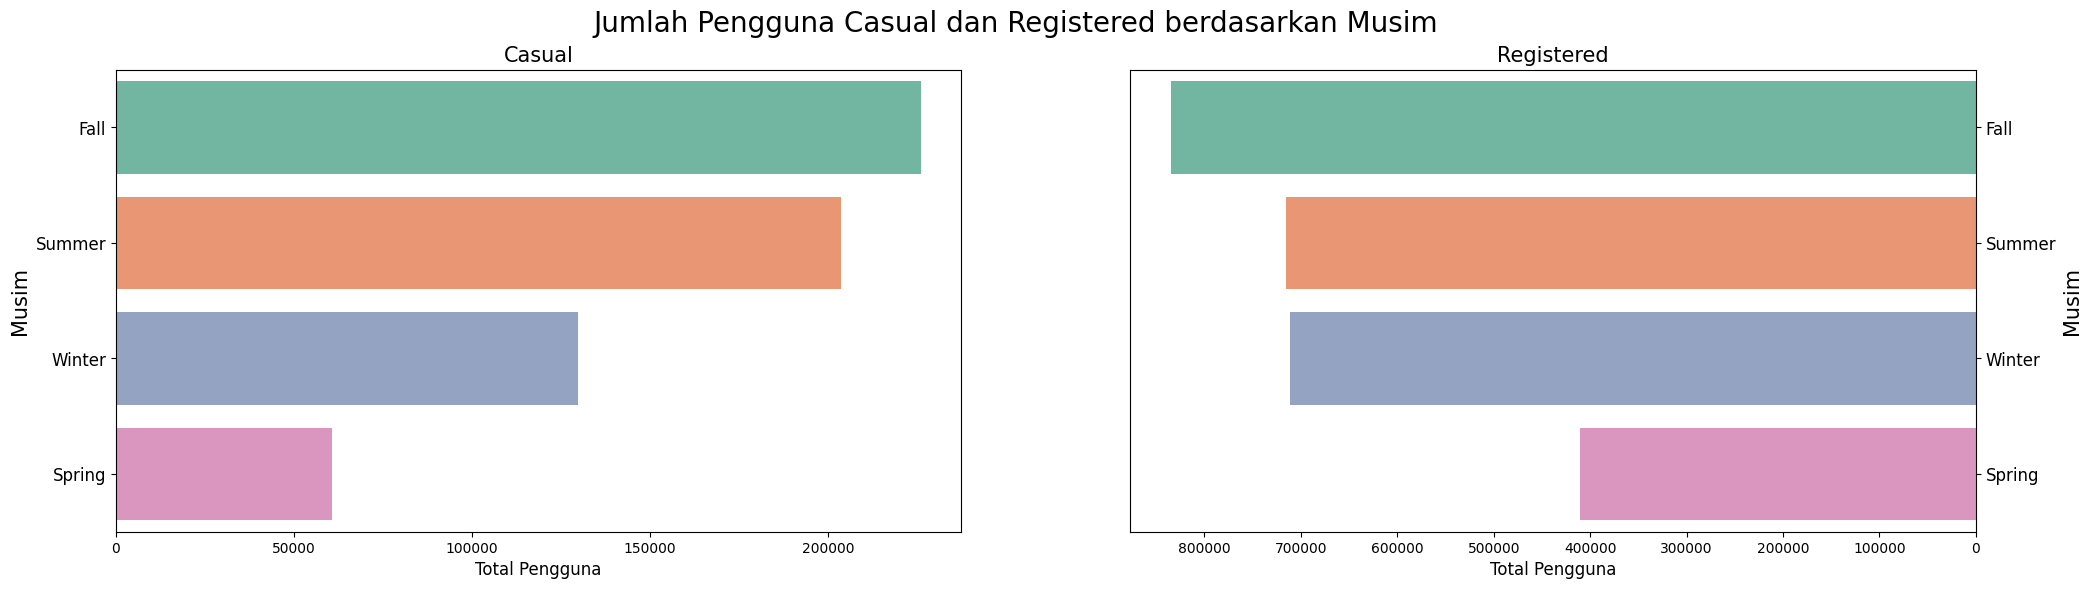

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="casual", y="season", data=sum_casual_user, palette='Set2', hue="season", legend=False, ax=ax[0])
ax[0].set_ylabel("Musim", fontsize=15)
ax[0].set_xlabel("Total Pengguna", fontsize=12)
ax[0].set_title("Casual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="registered", y="season", data=sum_registered_user, hue="season", legend=False, palette='Set2', ax=ax[1])
ax[1].set_ylabel("Musim", fontsize=15)
ax[1].set_xlabel("Total Pengguna", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Jumlah Pengguna Casual dan Registered berdasarkan Musim", fontsize=20)
plt.show()

Dapat dilihat bahwa pengguna Registered selalu mendominasi di setiap musim, dengan jumlah tertinggi terjadi pada musim Fall. Sementara itu, pengguna Casual menunjukkan variasi yang lebih besar, dengan jumlah tertinggi juga pada musim Fall dan terendah pada musim Winter. Hal ini menunjukkan bahwa musim dapat mempengaruhi preferensi dan jumlah pengguna sepeda berdasarkan tipe pengguna.

### Pertanyaan 2: Bagaimana penggunaan layanan Bike Sharing selama musim salju dilihat dari waktu?

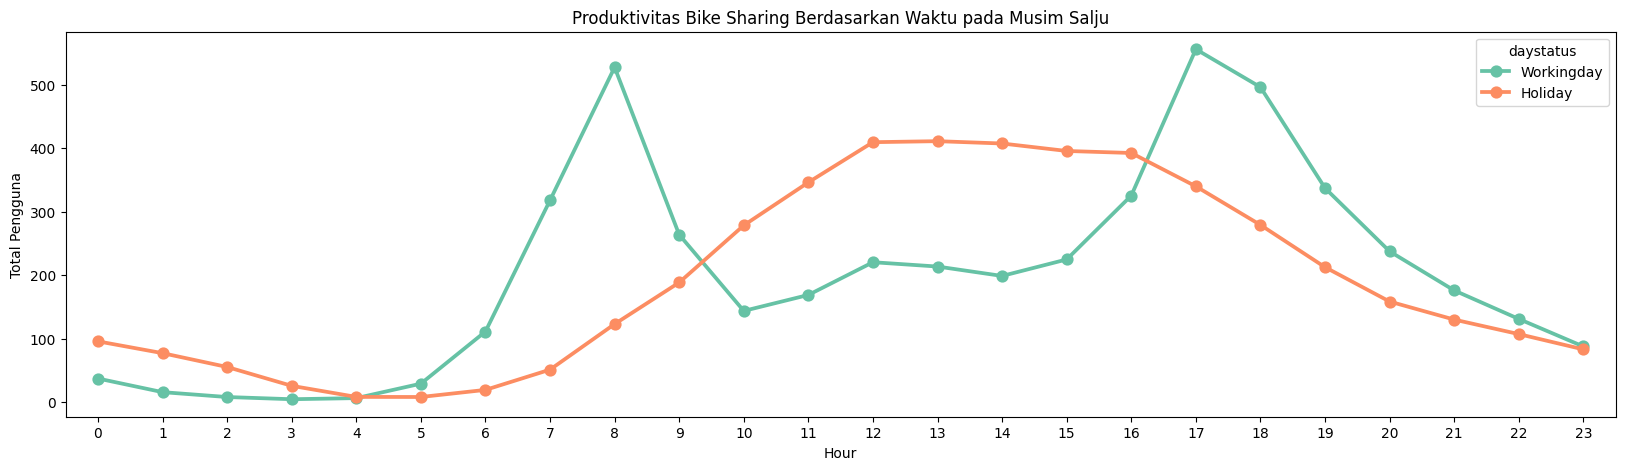

In [39]:
# Filter data untuk hanya musim Winter
winter_df = hour_df[hour_df['season'] == 'Winter']

fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=winter_df, x='hr', y='cnt', hue='daystatus', errorbar=None, ax=ax, palette="Set2")
ax.set(title='Produktivitas Bike Sharing Berdasarkan Waktu pada Musim Salju')
ax.set_ylabel('Total Pengguna')
ax.set_xlabel('Hour')
plt.show()

Produktivitas bike sharing berdasarkan jam pada workingday dan holiday selama musim dingin menunjukkan pola yang jelas. Terlihat adanya lonjakan penggunaan di pagi hari pada jam kerja, dengan puncak penggunaan antara pukul 7 dan 8 pagi. Setelah itu, terjadi penurunan tajam hingga sekitar pukul 10 pagi, kemudian penggunaan mulai meningkat lagi dan mencapai puncak kedua sekitar pukul 17.

### Pertanyaan 3: Seberapa besar pengaruh kondisi cuaca terhadap frekuensi penyewaan sepeda?

In [41]:
byweather = hour_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()

<ipython-input-42-8e1cd9e698a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="weathersit", data=byweather.sort_values(by="cnt", ascending=False),


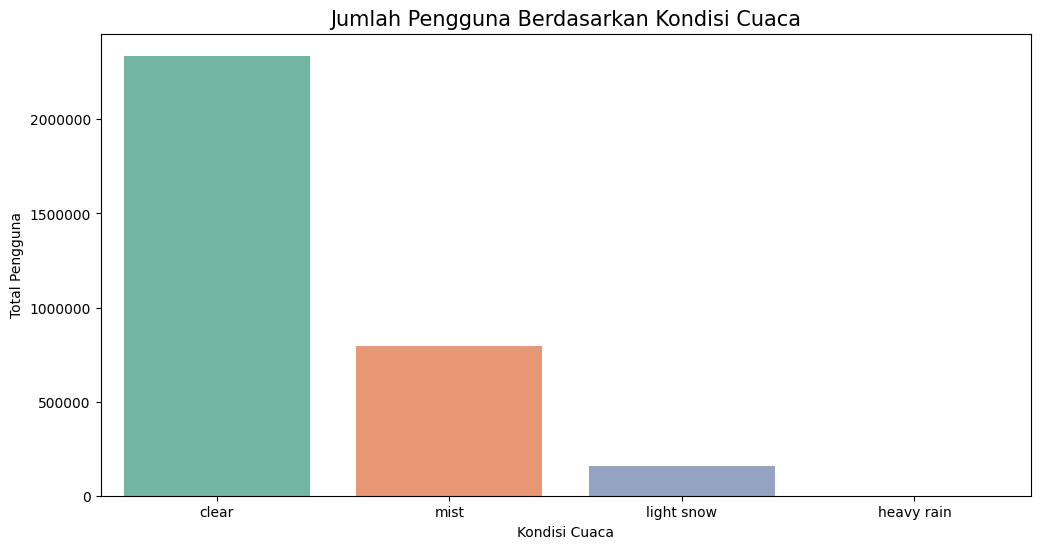

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(y="cnt", x="weathersit", data=byweather.sort_values(by="cnt", ascending=False),
            palette='Set2')
plt.title("Jumlah Pengguna Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel("Total Pengguna")
plt.xlabel("Kondisi Cuaca")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Jumlah pengguna paling tinggi tercatat saat kondisi cuaca cerah, sementara jumlah pengguna paling rendah terjadi saat cuaca hujan lebat. Hal ini menunjukkan bahwa orang cenderung lebih sering menggunakan layanan sepeda ketika cuaca cerah dan lebih enggan menggunakannya saat cuaca hujan lebat.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [43]:
rfm_df = hour_df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "cnt": "sum"
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,weekday,frequency,monetary,recency
0,Jumat,2487,487790,3
1,Kamis,2471,485395,4
2,Minggu,2502,444027,1
3,Rabu,2475,473048,5
4,Sabtu,2512,477807,2
5,Selasa,2453,469109,6
6,Senin,2479,455503,0


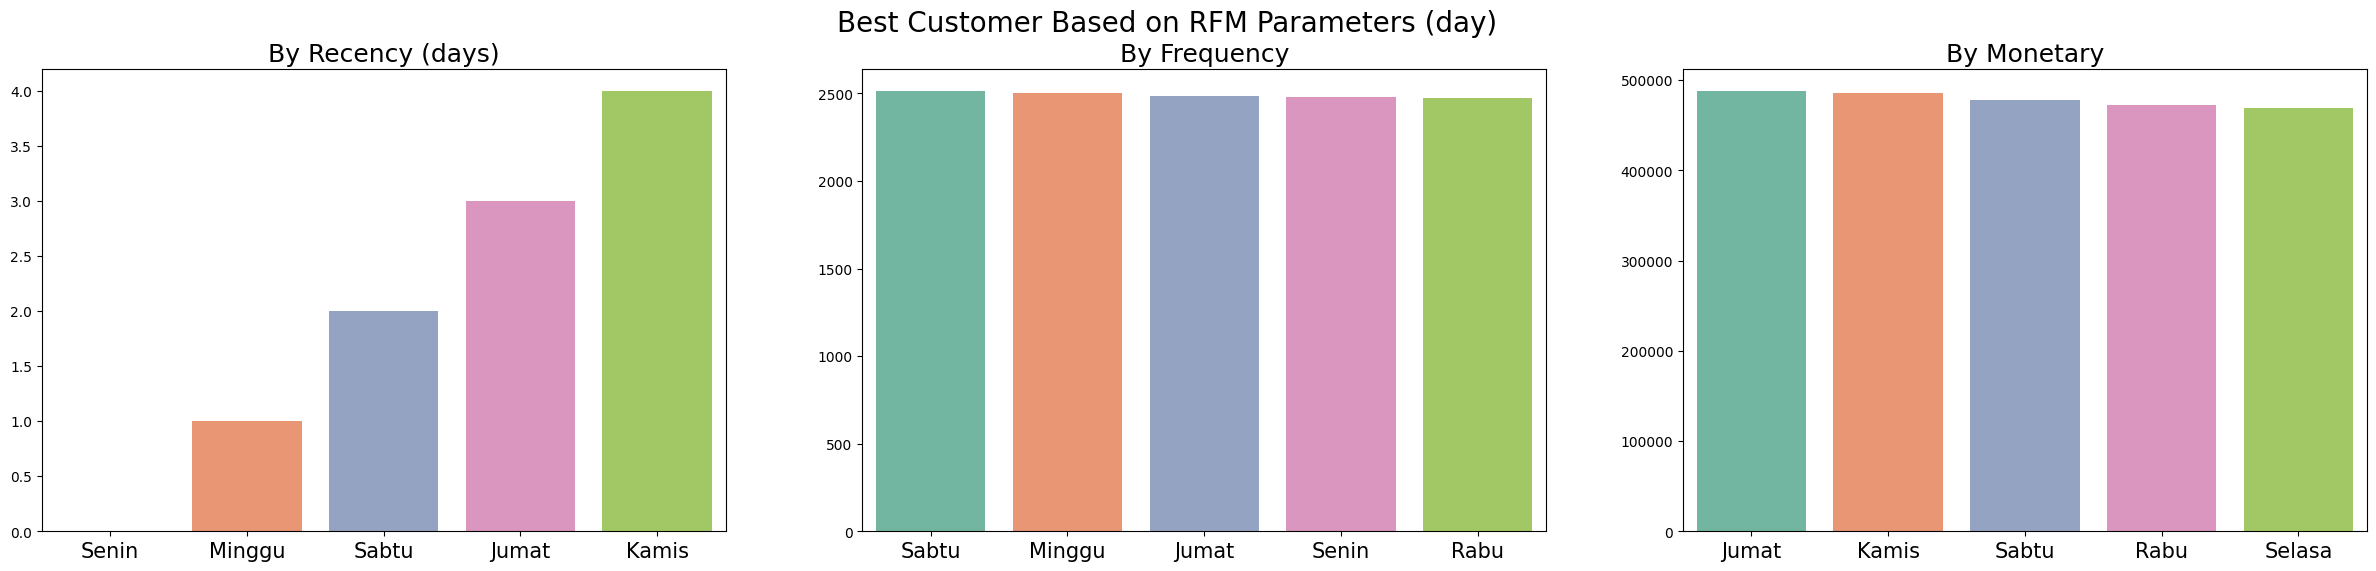

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette='Set2', hue="weekday", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette='Set2', hue="weekday", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="weekday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette='Set2', hue="weekday", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()

### Clustering: Mengelompokkan jumlah pelanggan menjadi Low/Middle/High

In [45]:
hour_df['cnt'].describe()

,cnt
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


In [46]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

min_cnt = hour_df['cnt'].min()
max_cnt = hour_df['cnt'].max()

hour_df['level_pengguna'] = pd.cut(hour_df['cnt'],
                                bins=[min_cnt, Q1, Q3, max_cnt],
                                labels=['Low', 'Middle', 'High'],
                                include_lowest=True)

In [47]:
hour_df.groupby('level_pengguna').head(3)

<ipython-input-47-be5d1376f80c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('level_pengguna').head(3)


,instant,dteday,season,yr,mnth,hr,weekday,daystatus,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,level_pengguna
0,1,2011-01-01,Spring,2011,Januari,0,Sabtu,Holiday,clear,0.24,0.2879,0.81,0.0000,3,13,16,Low
1,2,2011-01-01,Spring,2011,Januari,1,Sabtu,Holiday,clear,0.22,0.2727,0.80,0.0000,8,32,40,Low
2,3,2011-01-01,Spring,2011,Januari,2,Sabtu,Holiday,clear,0.22,0.2727,0.80,0.0000,5,27,32,Low
11,12,2011-01-01,Spring,2011,Januari,11,Sabtu,Holiday,clear,0.36,0.3333,0.81,0.2836,26,30,56,Middle
12,13,2011-01-01,Spring,2011,Januari,12,Sabtu,Holiday,clear,0.42,0.4242,0.77,0.2836,29,55,84,Middle
13,14,2011-01-01,Spring,2011,Januari,13,Sabtu,Holiday,mist,0.46,0.4545,0.72,0.2985,47,47,94,Middle
1070,1071,2011-02-17,Spring,2011,Februari,8,Kamis,Workingday,clear,0.32,0.3333,0.57,0.0896,18,267,285,High
1103,1104,2011-02-18,Spring,2011,Februari,17,Jumat,Workingday,clear,0.66,0.6212,0.34,0.3582,52,275,327,High
1305,1306,2011-02-27,Spring,2011,Februari,14,Minggu,Holiday,clear,0.44,0.4394,0.47,0.0896,105,177,282,High


In [48]:
total_level_pengguna = hour_df.groupby("level_pengguna")['level_pengguna'].count().sort_values(ascending=False).reset_index(name='count')
total_level_pengguna

<ipython-input-48-db6df6a17c7e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_level_pengguna = hour_df.groupby("level_pengguna")['level_pengguna'].count().sort_values(ascending=False).reset_index(name='count')


,level_pengguna,count
0,Middle,8676
1,Low,4377
2,High,4326


<ipython-input-49-2031d5026ea5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='level_pengguna', y='count', data=total_level_pengguna, palette='Set2')


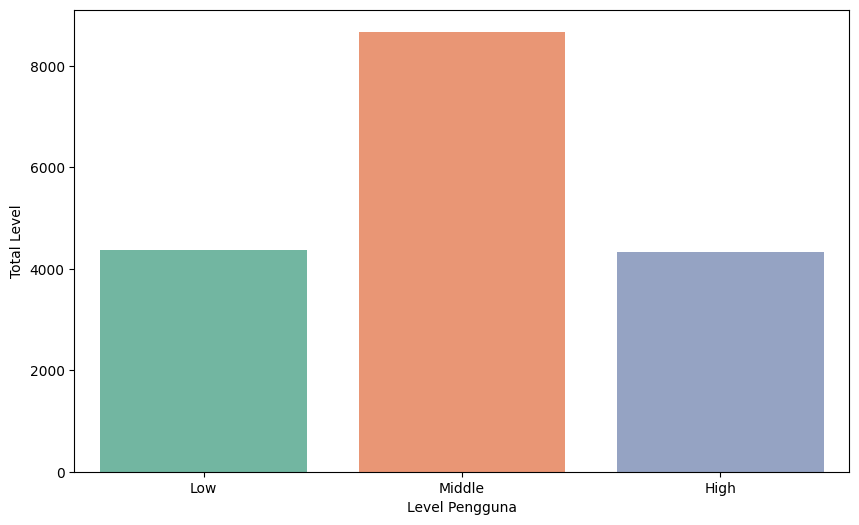

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='level_pengguna', y='count', data=total_level_pengguna, palette='Set2')
plt.ylabel('Total Level')
plt.xlabel('Level Pengguna')
plt.show()

## Conclusion

- pertanyaan 1: Pengguna Registered selalu mendominasi di semua musim, saran kepada owner untuk lebih menekankan promosi untuk pengguna casual.
- pertanyaan 2: Produktivitas bike sharing lebih tinggi pada hari kerja dibanding libur.
Puncak penggunaan bike sharing pada hari kerja terjadi sekitar pukul 17.00.
Pada Holiday, puncak penggunaan bike sharing terjadi sekitar pukul 12.00.
- Pertanyaan 3: Kondisi cuaca "clear" memiliki jumlah penyewaan sepeda yang jauh lebih tinggi dibandingkan dengan kondisi cuaca lainnya. Hal ini menunjukkan bahwa kondisi cuaca yang cerah sangat mendukung kegiatan bersepeda.

In [50]:
hour_df.to_csv('data_clean.csv', index=False)